# 목차

## 신한카드
  ### 내국인 데이터


*   [성별_나이별 매출액 그래프](https://colab.research.google.com/drive/1fjhz69yVZaV_8h1HZ13z5zxpXZpPrZR9#scrollTo=omd_U0OsrrIe)
*   [성별&나이별 매출액을 계산](https://colab.research.google.com/drive/1fjhz69yVZaV_8h1HZ13z5zxpXZpPrZR9#scrollTo=Cq_nxzv3rrIh)
*   [4개의 구별 매출액을 계산](https://colab.research.google.com/drive/1fjhz69yVZaV_8h1HZ13z5zxpXZpPrZR9#scrollTo=_4lOhS0YrrIk)
*   [69개의 동별/total_code 사용/ 매출액을 계산](https://colab.research.google.com/drive/1fjhz69yVZaV_8h1HZ13z5zxpXZpPrZR9#scrollTo=Hg3wuxoPrrIn)
*   [23개의 업종별 매출액을 계산](https://colab.research.google.com/drive/1fjhz69yVZaV_8h1HZ13z5zxpXZpPrZR9#scrollTo=LJGQdih5rrIp)
*   [날짜별 매출액을 계산](https://colab.research.google.com/drive/1fjhz69yVZaV_8h1HZ13z5zxpXZpPrZR9#scrollTo=oVfjjZ1FrrIv&line=1&uniqifier=1)
*   [동&날짜별 매출액을 계산](https://colab.research.google.com/drive/1fjhz69yVZaV_8h1HZ13z5zxpXZpPrZR9#scrollTo=VOSCRIrB7SU5&line=1&uniqifier=1)
*   [년 & 업종별 ](https://colab.research.google.com/drive/1fjhz69yVZaV_8h1HZ13z5zxpXZpPrZR9#scrollTo=qGkT9MPu7ilS&line=1&uniqifier=1)
*   [년 & 동별](https://colab.research.google.com/drive/1fjhz69yVZaV_8h1HZ13z5zxpXZpPrZR9#scrollTo=86Xq5lZz7t58&line=1&uniqifier=1) 
*   [월별 매출액](https://colab.research.google.com/drive/1fjhz69yVZaV_8h1HZ13z5zxpXZpPrZR9#scrollTo=z9WkAWAB7zTc&line=1&uniqifier=1)






  ### 외국인 데이터
## 와이즈넛
## CJ물류

In [ ]:
# from IPython.core.display import display, HTML
# display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
import pandas as pd
pd.set_option('display.max_colwidth', -1)

C:\Users\LG\.conda\envs\multi_campus\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [4]:
# 한글 깨짐 현상을 해결
import matplotlib
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [5]:
import pickle

with open('C:/Users/LG/bigcontest/dataset/CJ_DATA.bin', 'rb') as f:
    cj_data = pickle.load(f) 
with open('C:/Users/LG/bigcontest/dataset/GS_DATA.bin', 'rb') as f:
    gs_data = pickle.load(f) 
with open('C:/Users/LG/bigcontest/dataset/SK_DATA.bin', 'rb') as f:
    sk_data = pickle.load(f) 
with open('C:/Users/LG/bigcontest/dataset/SH_DATA.bin', 'rb') as f:
    sh_data = pickle.load(f) 
with open('C:/Users/LG/bigcontest/dataset/WS_DATA.bin', 'rb') as f:
    ws_data = pickle.load(f) 

# 신한 카드  EDA

#### 신한카드 데이터

In [6]:
sh_data.keys()

dict_keys(['SH_RESIDENT', 'SH_FOREIGN', 'INDUSTRY_CODE_DICT', 'COL_CHANGE_DICT', 'GEO_CODE_DICT'])

In [7]:
resident = sh_data['SH_RESIDENT']
foreign  = sh_data['SH_FOREIGN']

In [8]:
resident.head()

,DATE,YEAR,MONTH,DAY,GU_CODE,DONG_CODE,INDUSTRY_CODE,SEX,AGE,USE_CNT,USE_AMT,SI_CODE,TOTAL_CODE
0,2019-02-01,2019,2,1,11,517,10,F,25,11,595,27,2711517
1,2019-02-01,2019,2,1,11,517,10,F,50,5,243,27,2711517
2,2019-02-01,2019,2,1,11,517,10,F,55,5,27,27,2711517
3,2019-02-01,2019,2,1,11,517,10,M,20,11,243,27,2711517
4,2019-02-01,2019,2,1,11,517,10,M,25,11,433,27,2711517


In [9]:
foreign.head()
# 'USE_AMT'에 3건의 결측값이 존재한다.  -> 결측치 채우는 방법 1. 평균값, 2. 최소값

,DATE,YEAR,MONTH,DAY,GU_CODE,DONG_CODE,INDUSTRY_CODE,COUNTRY_NM,USE_CNT,USE_AMT,SI_CODE,TOTAL_CODE
0,2019-02-04,2019,2,4,26,510,81,대만,2,30.0,27,2726510
1,2019-02-13,2019,2,13,26,510,40,대만,2,32.0,27,2726510
2,2019-04-16,2019,4,16,26,510,40,대만,2,16.0,27,2726510
3,2019-04-19,2019,4,19,26,510,42,대만,3,610.0,27,2726510
4,2019-03-08,2019,3,8,26,510,10,대만,7,629.0,27,2726510


### 외국인 데이터

##### 4개의 구별 매출액을 계산

{'00': '전체', '14': '(서울)중구', '35': '노원구', '11': '(대구)중구', '26': '수성구'}


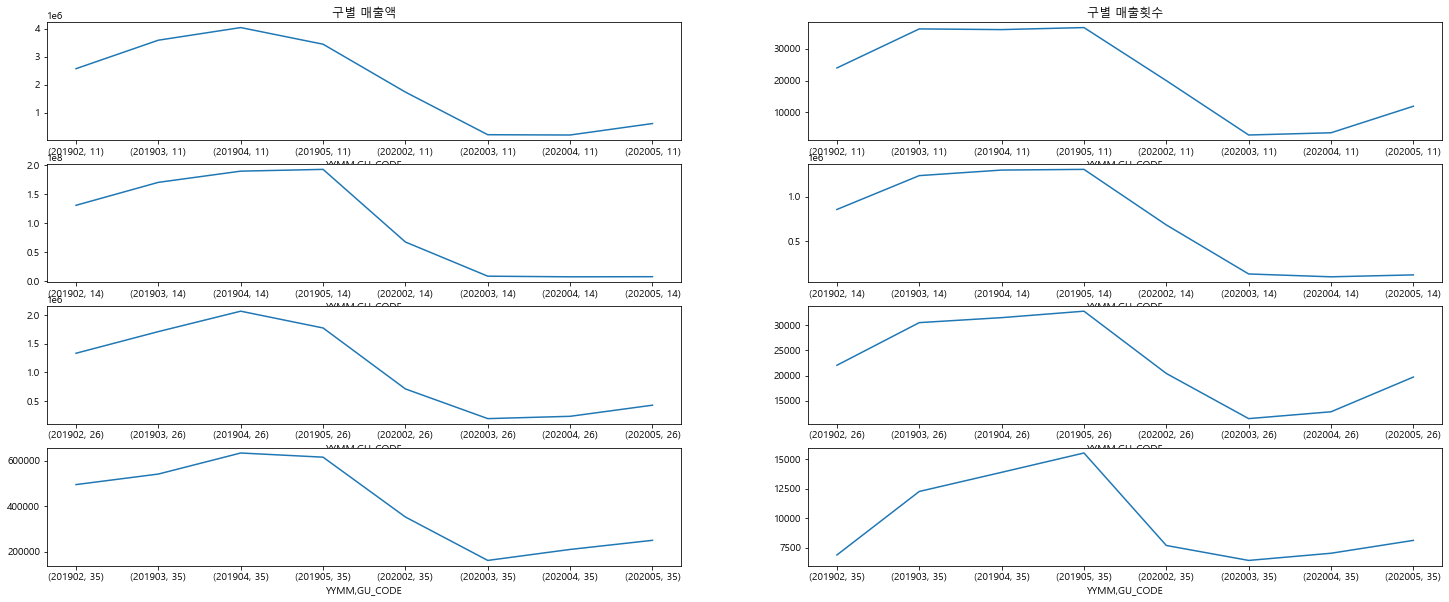

In [10]:
foreign['YYMM'] = (foreign['YEAR']*100)+foreign['MONTH']

# 1. 각 구 코드를 그룹해서 'USE_AMT'의 합을 구한다.
gu_to_amt = foreign.groupby(['YYMM', 'GU_CODE'])['USE_AMT'].sum()
gu_to_cnt = foreign.groupby(['YYMM', 'GU_CODE'])['USE_CNT'].sum()


# 2, subplot 표로 작성
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(25, 10))
gu_to_amt[::4].plot(kind='line', fontsize=10, ax=axes[0,0])
gu_to_amt[1::4].plot(kind='line', fontsize=10, ax=axes[1,0])
gu_to_amt[2::4].plot(kind='line', fontsize=10, ax=axes[2,0])
gu_to_amt[3::4].plot(kind='line', fontsize=10, ax=axes[3,0])

gu_to_cnt[::4].plot(kind='line', fontsize=10, ax=axes[0,1])
gu_to_cnt[1::4].plot(kind='line', fontsize=10, ax=axes[1,1])
gu_to_cnt[2::4].plot(kind='line', fontsize=10, ax=axes[2,1])
gu_to_cnt[3::4].plot(kind='line', fontsize=10, ax=axes[3,1])


axes[0,0].set_title('구별 매출액')
axes[0,1].set_title('구별 매출횟수')

textstr = sh_data['GEO_CODE_DICT']['DICT_GU']
print(textstr)

plt.show()

#### 나라별 매출액을 계산  

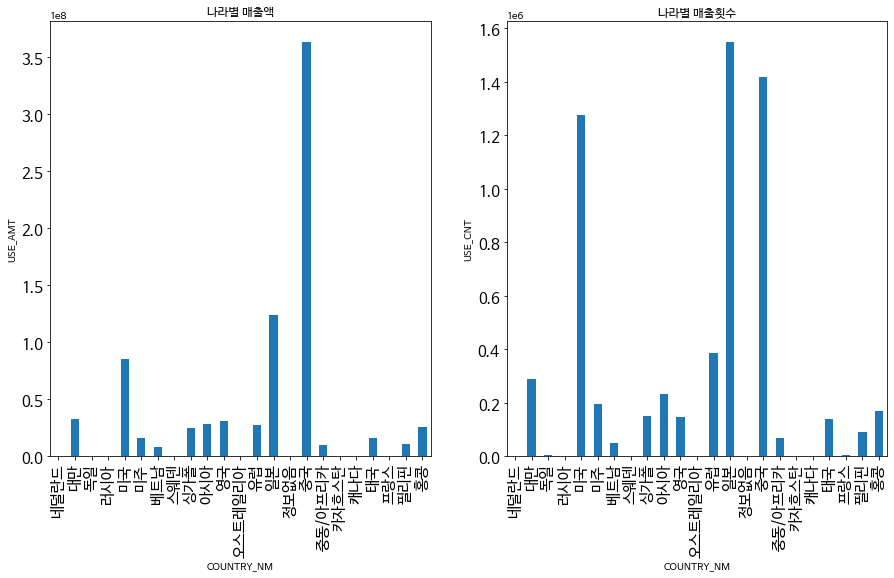

In [ ]:
# 1. 각 구 코드를 그룹해서 'USE_AMT'의 합을 구한다.
gu_to_amt = foreign.groupby('COUNTRY_NM')['USE_AMT'].sum()
gu_to_cnt = foreign.groupby('COUNTRY_NM')['USE_CNT'].sum()

# 2, subplot 표로 작성
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 8))
gu_to_amt.plot(kind='bar', fontsize=15, ax=axes[0])
gu_to_cnt.plot(kind='bar', fontsize=15, ax=axes[1])

axes[0].set_xlabel('COUNTRY_NM')
axes[1].set_xlabel('COUNTRY_NM')

axes[0].set_ylabel('USE_AMT')
axes[1].set_ylabel('USE_CNT')

axes[0].set_title('나라별 매출액')
axes[1].set_title('나라별 매출횟수')

plt.show()

#### 23개의 업종별 매출액을 계산  

{10: '숙박', 20: '레저용품', 21: '레저업소', 22: '문화취미', 30: '가구', 31: '전기', 32: '주방용구', 33: '연료판매', 34: '광학제품', 35: '가전', 40: '유통업', 42: '의복', 43: '직물', 44: '신변잡화', 50: '서적문구', 52: '사무통신', 60: '자동차판매', 62: '자동차정비', 70: '의료기관', 71: '보건위생', 80: '요식업소', 81: '음료식품', 92: '수리서비스'}


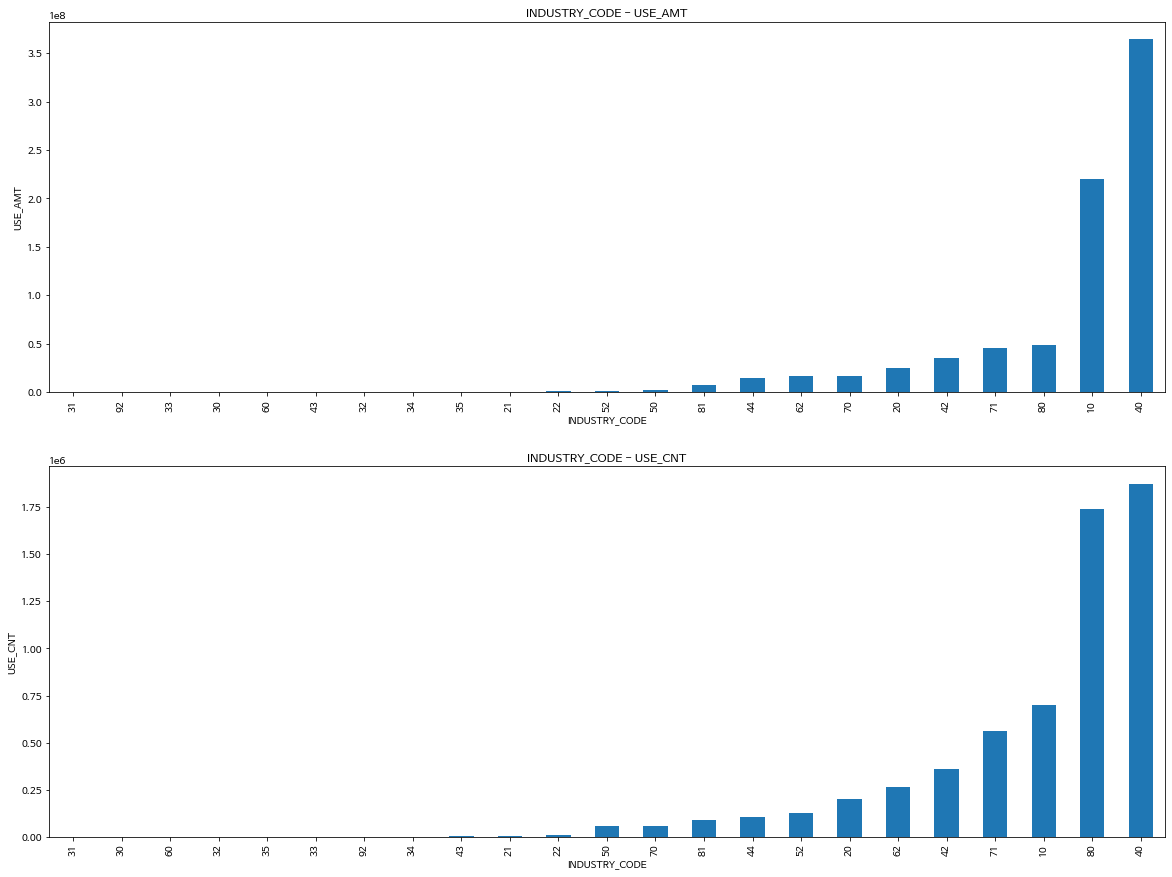

In [ ]:
# 1. 각 업종별 코드를 그룹해서 'USE_AMT'의 합을 구한다
industry_to_amt = foreign.groupby('INDUSTRY_CODE')['USE_AMT'].sum().sort_values()
industry_to_cnt = foreign.groupby('INDUSTRY_CODE')['USE_CNT'].sum().sort_values()


# 2, subplot 표로 작성
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))
industry_to_amt.plot(kind='bar', fontsize=10, ax=axes[0])
industry_to_cnt.plot(kind='bar', fontsize=10, ax=axes[1])

axes[0].set_xlabel('INDUSTRY_CODE')
axes[1].set_xlabel('INDUSTRY_CODE')

axes[0].set_ylabel('USE_AMT')
axes[1].set_ylabel('USE_CNT')

axes[0].set_title('INDUSTRY_CODE - USE_AMT')
axes[1].set_title('INDUSTRY_CODE - USE_CNT')

textstr = sh_data['INDUSTRY_CODE_DICT']
print(textstr)

plt.show()

#### 년 & 업종별 

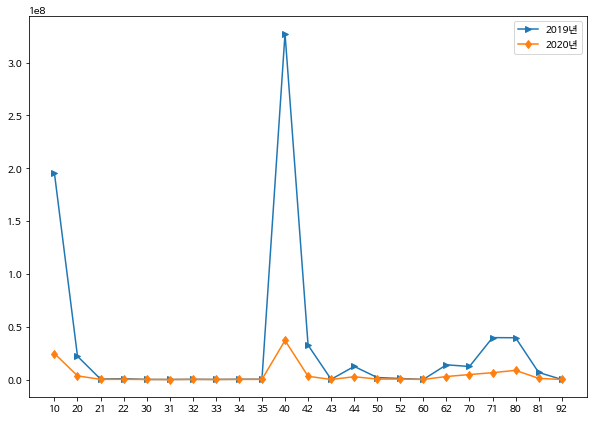

In [ ]:
# 1. 각 날짜의 'USE_AMT'의 합을 구한다
yymm_industry_to_amt = foreign.groupby(['YEAR','INDUSTRY_CODE'])['USE_AMT'].sum()
# print(yymm_industry_to_amt[:23], yymm_industry_to_amt[-23:])
label = sorted(foreign['INDUSTRY_CODE'].unique())
index = np.arange(len(label))

plt.figure(figsize = (10,7))
plt.plot(index, yymm_industry_to_amt[:23],'>-' , label='2019년')
plt.plot(index, yymm_industry_to_amt[-23:],'d-', label='2020년')
plt.xticks(index, label)
plt.legend()
plt.show()

####  년 & 동별 

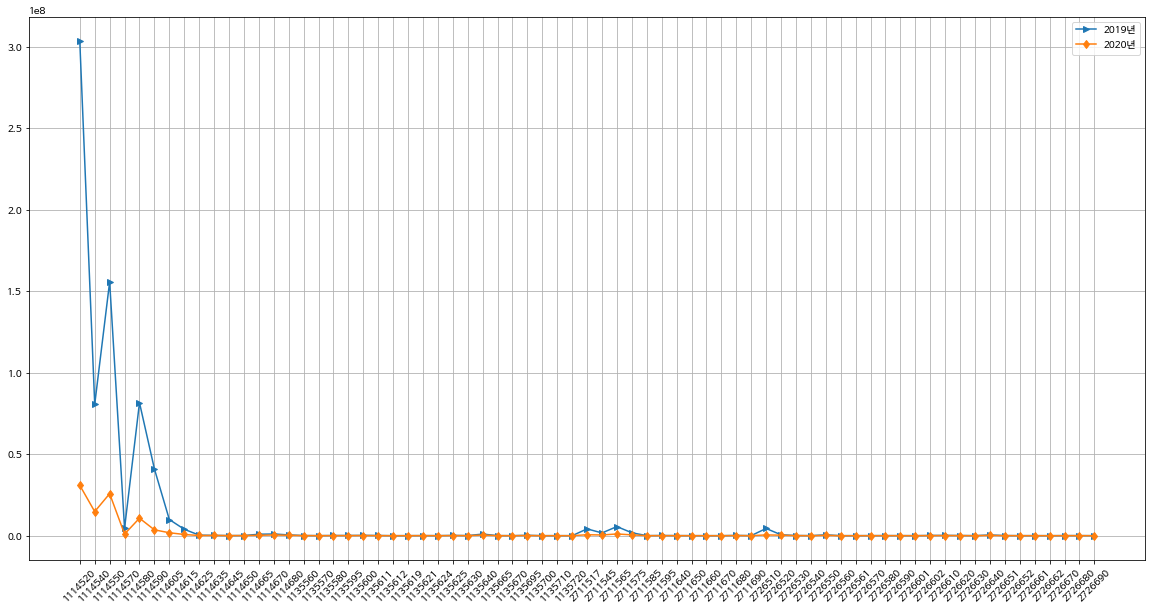

In [ ]:
# 1. 각 날짜의 'USE_AMT'의 합을 구한다
yymm_totalcode_to_amt = foreign.groupby(['YEAR','TOTAL_CODE'])['USE_AMT'].sum()
# print(yymm_totalcode_to_amt[:69], yymm_totalcode_to_amt[-69:])

label = sorted(foreign['TOTAL_CODE'].unique())
index = np.arange(len(label))

plt.figure(figsize = (20,10))
plt.plot(index, yymm_totalcode_to_amt[:69],'>-', label='2019년')
plt.plot(index, yymm_totalcode_to_amt[-69:],'d-', label='2020년')
plt.xticks(index,label,  rotation='45')
plt.legend()
plt.grid()
plt.show()

#### 월별 매출액

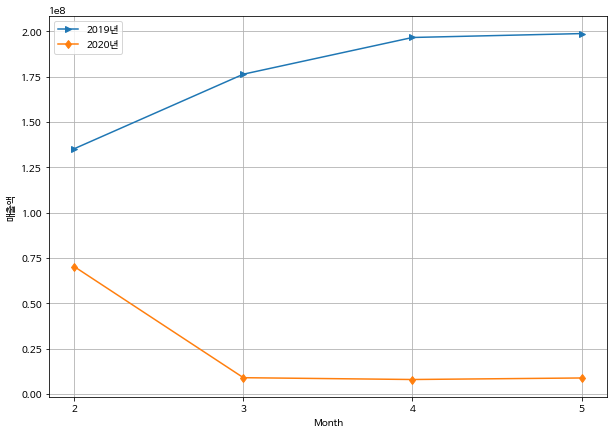

In [ ]:
# 1. 각 월의 'USE_AMT'의 합을 구한다
yymm_to_amt = foreign.groupby(['YYMM'])['USE_AMT'].sum()
# print(yymm_to_amt[:4], yymm_to_amt[-4:])

label = sorted(foreign['MONTH'].unique())
index = np.arange(len(label))

plt.figure(figsize = (10,7))
plt.plot(index, yymm_to_amt[:4],'>-', label='2019년')
plt.plot(index,  yymm_to_amt[-4:],'d-', label='2020년')
plt.xticks(index, label)
plt.xlabel('Month')
plt.ylabel('매출액')
plt.legend()
plt.grid()
plt.show()

### 내국인 데이터

#### 매출액 정규화

In [ ]:
# # 정규화를 통해 매출액의 분포가 정규분포를 가지도록 만듦
# from scipy import stats #Analysis 

# fig = plt.figure(figsize = (15,10))

# fig.add_subplot(1,2,1)
# res = stats.probplot(resident['USE_AMT'], plot=plt)

# fig.add_subplot(1,2,2)
# res = stats.probplot(np.log1p(resident['USE_AMT']), plot=plt)

In [ ]:
# # 정규분포를 가지도록 변환
# resident['USE_AMT'] = np.log1p(resident['USE_AMT'])
# # 히스토그램 
# f, ax = plt.subplots(figsize=(8, 6))
# sns.distplot(resident['USE_AMT'])

##### 그룹별 그래프 그리기
- ~ 별 -> groupby의 기준열로 들어간다.
- ~를 계산 -> 데이터그룹화의 결과물에 ['칼럼명']으로 추출


#### 성별/나이별 매출액을 계산 

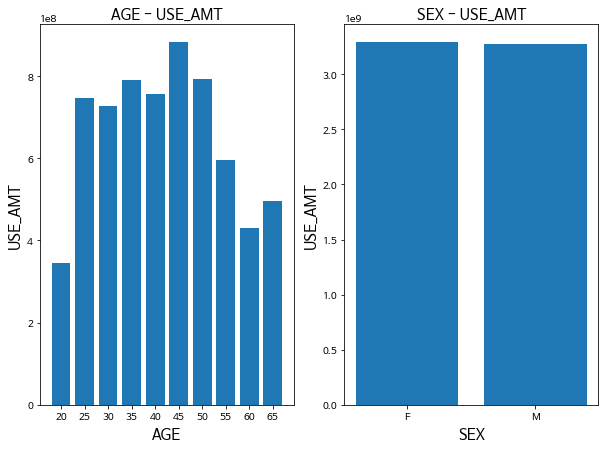

In [ ]:
# 1. 각 성별/나이별을 그룹해서 'USE_AMT'의 합을 구한다.
age_to_amt = resident.groupby('AGE')['USE_AMT'].sum()
sex_to_amt = resident.groupby('SEX')['USE_AMT'].sum()

# 그래프 그리기
label = sorted(resident['AGE'].unique())
index = np.arange(len(label))

plt.figure(figsize = (10,7))

plt.subplot(1,2,1)
plt.bar(index, age_to_amt)
plt.xticks(index, label)
plt.xlabel('AGE', fontsize = 15)
plt.ylabel('USE_AMT', fontsize = 15)
plt.title("AGE - USE_AMT", fontsize = 15)

label = sorted(resident['SEX'].unique())
index = np.arange(len(label))

plt.subplot(1,2,2)
plt.bar(index, sex_to_amt)
plt.xticks(index, label)
plt.xlabel('SEX', fontsize = 15)
plt.ylabel('USE_AMT', fontsize = 15)
plt.title("SEX - USE_AMT", fontsize = 15)

plt.show()

#### 성별&나이별 매출액을 계산 

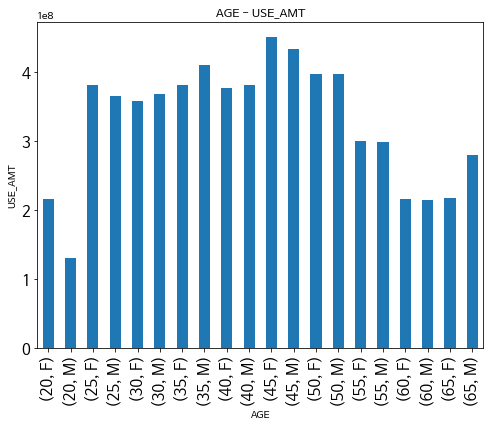

In [ ]:
# 1. 각 성별&나이별을 그룹해서 USE_AMT'의 합을 구한다.
age_sex_to_amt = resident.groupby(['AGE', 'SEX'])['USE_AMT'].sum()
# print(age_sex_to_amt)

plt.figure(figsize=(8, 6))
age_sex_to_amt.plot(kind='bar', fontsize=15)
plt.xlabel('AGE')
plt.ylabel('USE_AMT')
plt.title('AGE - USE_AMT')
plt.show()

#### 4개의 구별 매출액을 계산 

{'00': '전체', '14': '(서울)중구', '35': '노원구', '11': '(대구)중구', '26': '수성구'}


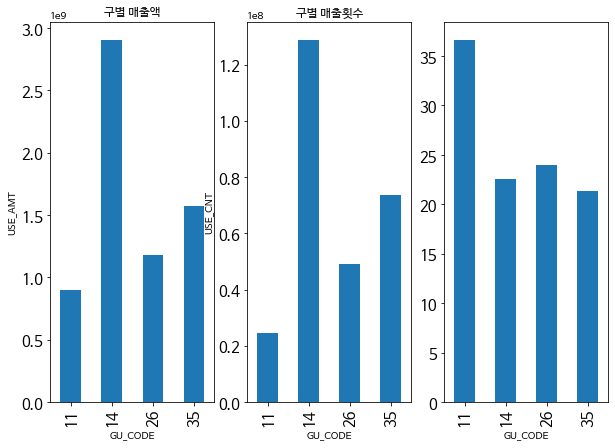

In [ ]:
 # 1. 각 구 코드를 그룹해서 'USE_AMT'의 합을 구한다.
gu_to_amt = resident.groupby('GU_CODE')['USE_AMT'].sum()
gu_to_cnt = resident.groupby('GU_CODE')['USE_CNT'].sum()
mmmm = gu_to_amt / gu_to_cnt
# 2, subplot 표로 작성
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 7))
gu_to_amt.plot(kind='bar', fontsize=15, ax=axes[0])
gu_to_cnt.plot(kind='bar', fontsize=15, ax=axes[1])
mmmm.plot(kind='bar', fontsize=15, ax=axes[2])

axes[0].set_xlabel('GU_CODE')
axes[1].set_xlabel('GU_CODE')

axes[0].set_ylabel('USE_AMT')
axes[1].set_ylabel('USE_CNT')

axes[0].set_title('구별 매출액')
axes[1].set_title('구별 매출횟수')

textstr = sh_data['GEO_CODE_DICT']['DICT_GU']
print(textstr)

plt.show()

#### 69개의 동별(total_code 사용) 매출액을 계산  

{'1114665': '서울중구동화동', '1114615': '서울중구신당동', '2711565': '대구중구성내1동', '2711650': '대구중구남산2동', '2726690': '대구수성구고산3동', '1114540': '서울중구회현동', '2726510': '대구수성구범어1동', '1114670': '서울중구황학동', '2711670': '대구중구남산4동', '2711595': '대구중구대신동', '2726630': '대구수성구파동', '2726652': '대구수성구지산2동', '2726560': '대구수성구만촌2동', '1114635': '서울중구약수동', '1114645': '서울중구청구동', '1135720': '서울노원구상계10동', '1135700': '서울노원구상계8동', '1135710': '서울노원구상계9동', '2726651': '대구수성구지산1동', '1135560': '서울노원구월계1동', '2711690': '대구중구대봉2동', '1114550': '서울중구명동', '1135595': '서울노원구공릉1동', '1135580': '서울노원구월계3동', '1135612': '서울노원구하계2동', '2711575': '대구중구성내2동', '2711585': '대구중구성내3동', '2726590': '대구수성구수성4가동', '2726530': '대구수성구범어3동', '2711545': '대구중구삼덕동', '1135600': '서울노원구공릉2동', '2711640': '대구중구남산1동', '2726561': '대구수성구만촌3동', '2726610': '대구수성구중동', '2711517': '대구중구동인동', '1114650': '서울중구신당제5동', '2726670': '대구수성구고산1동', '1114605': '서울중구을지로동', '2726620': '대구수성구상동', '1135611': '서울노원구하계1동', '2726540': '대구수성구범어4동', '1114520': '서울중구소공동', '2726520': '대구수성구범어2동', '2

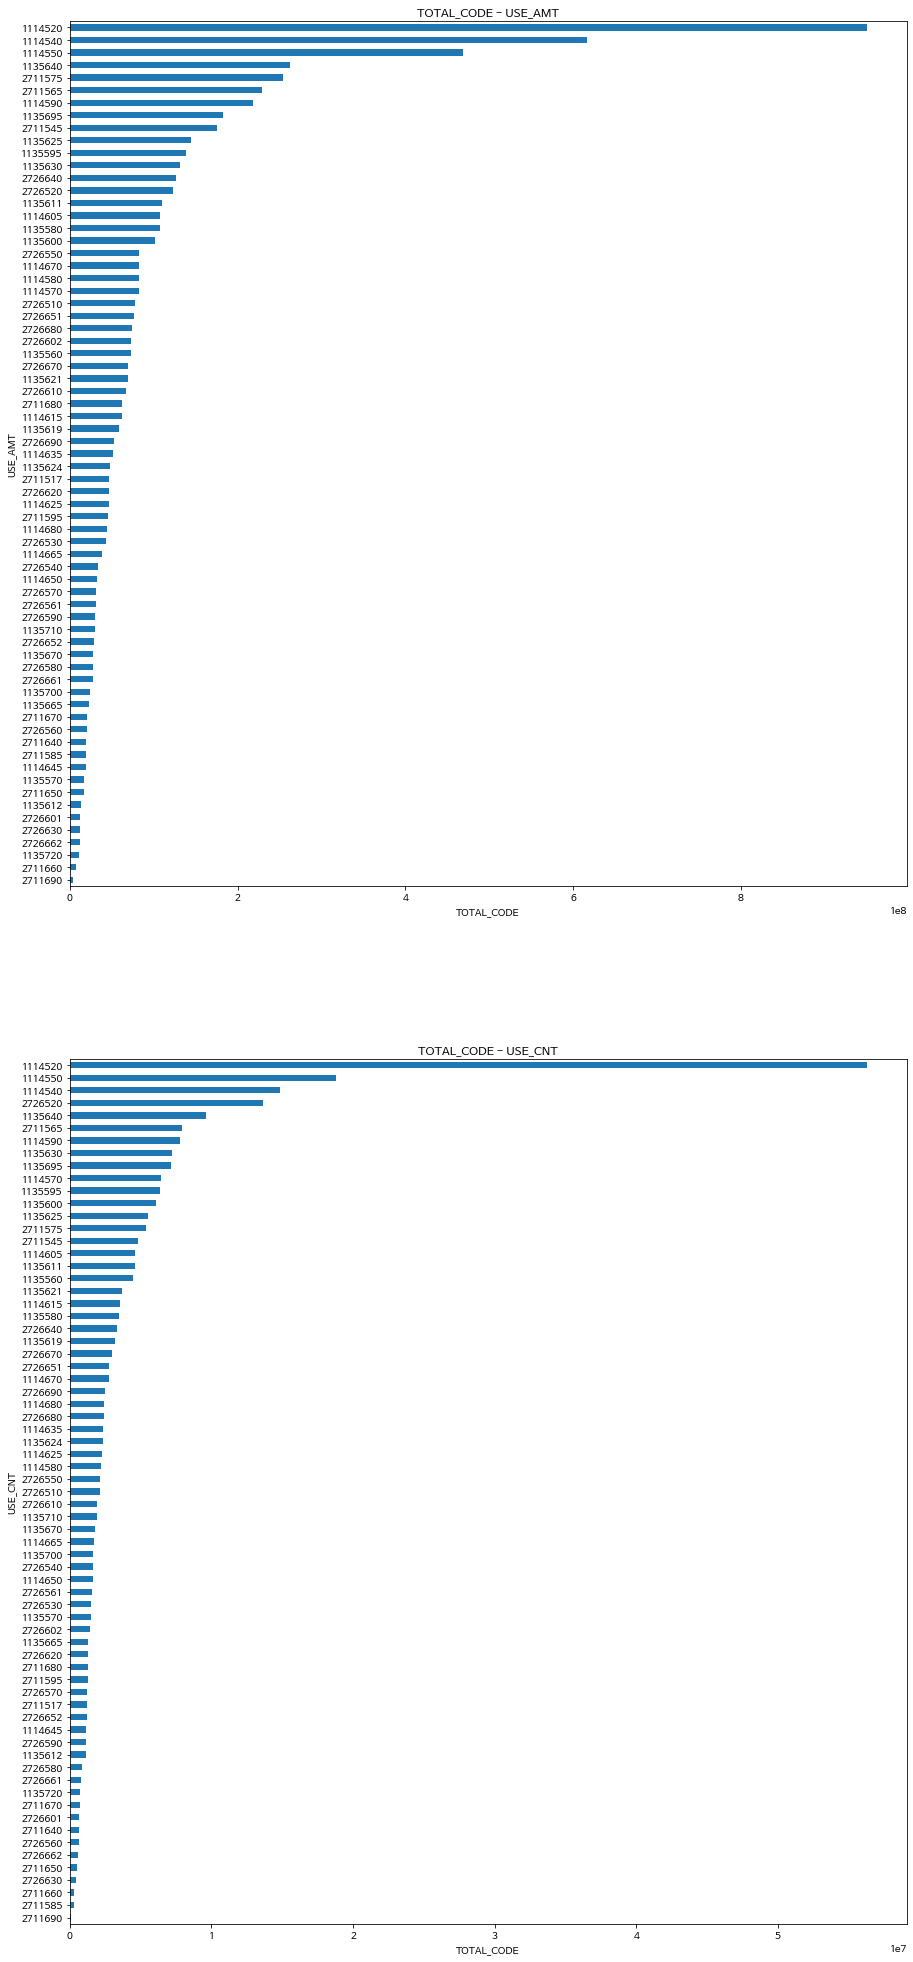

In [ ]:
# 1. 각 동 코드를 그룹해서 'USE_AMT'의 합을 구한다
total_to_amt = resident.groupby('TOTAL_CODE')['USE_AMT'].sum().sort_values()
total_to_cnt = resident.groupby('TOTAL_CODE')['USE_CNT'].sum().sort_values()

# 2, subplot 표로 작성
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 35))
total_to_amt.plot(kind='barh', fontsize=10, ax=axes[0])
total_to_cnt.plot(kind='barh', fontsize=10, ax=axes[1])

axes[0].set_xlabel('TOTAL_CODE')
axes[1].set_xlabel('TOTAL_CODE')

axes[0].set_ylabel('USE_AMT')
axes[1].set_ylabel('USE_CNT')

axes[0].set_title('TOTAL_CODE - USE_AMT')
axes[1].set_title('TOTAL_CODE - USE_CNT')

textstr = sh_data['GEO_CODE_DICT']['DICT_TOTAL']
print(textstr)

plt.show()

#### 23개의 업종별 매출액을 계산 

{10: '숙박', 20: '레저용품', 21: '레저업소', 22: '문화취미', 30: '가구', 31: '전기', 32: '주방용구', 33: '연료판매', 34: '광학제품', 35: '가전', 40: '유통업', 42: '의복', 43: '직물', 44: '신변잡화', 50: '서적문구', 52: '사무통신', 60: '자동차판매', 62: '자동차정비', 70: '의료기관', 71: '보건위생', 80: '요식업소', 81: '음료식품', 92: '수리서비스'}


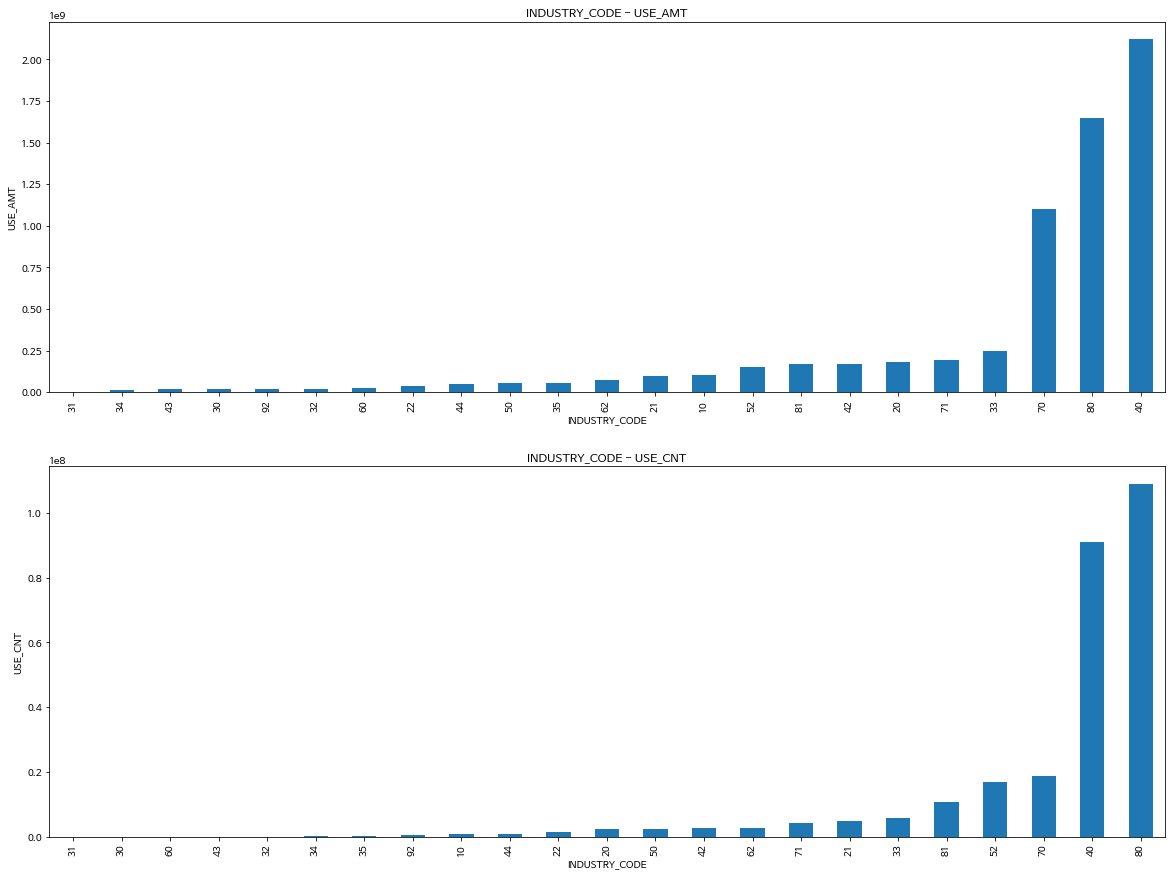

In [ ]:

# 1. 각 업종별 코드를 그룹해서 'USE_AMT'의 합을 구한다
industry_to_amt = resident.groupby('INDUSTRY_CODE')['USE_AMT'].sum().sort_values()
industry_to_cnt = resident.groupby('INDUSTRY_CODE')['USE_CNT'].sum().sort_values()


# 2, subplot 표로 작성
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 15))
industry_to_amt.plot(kind='bar', fontsize=10, ax=axes[0])
industry_to_cnt.plot(kind='bar', fontsize=10, ax=axes[1])

axes[0].set_xlabel('INDUSTRY_CODE')
axes[1].set_xlabel('INDUSTRY_CODE')

axes[0].set_ylabel('USE_AMT')
axes[1].set_ylabel('USE_CNT')

axes[0].set_title('INDUSTRY_CODE - USE_AMT')
axes[1].set_title('INDUSTRY_CODE - USE_CNT')

textstr = sh_data['INDUSTRY_CODE_DICT']
print(textstr)

plt.show()

#### 날짜별 매출액을 계산 

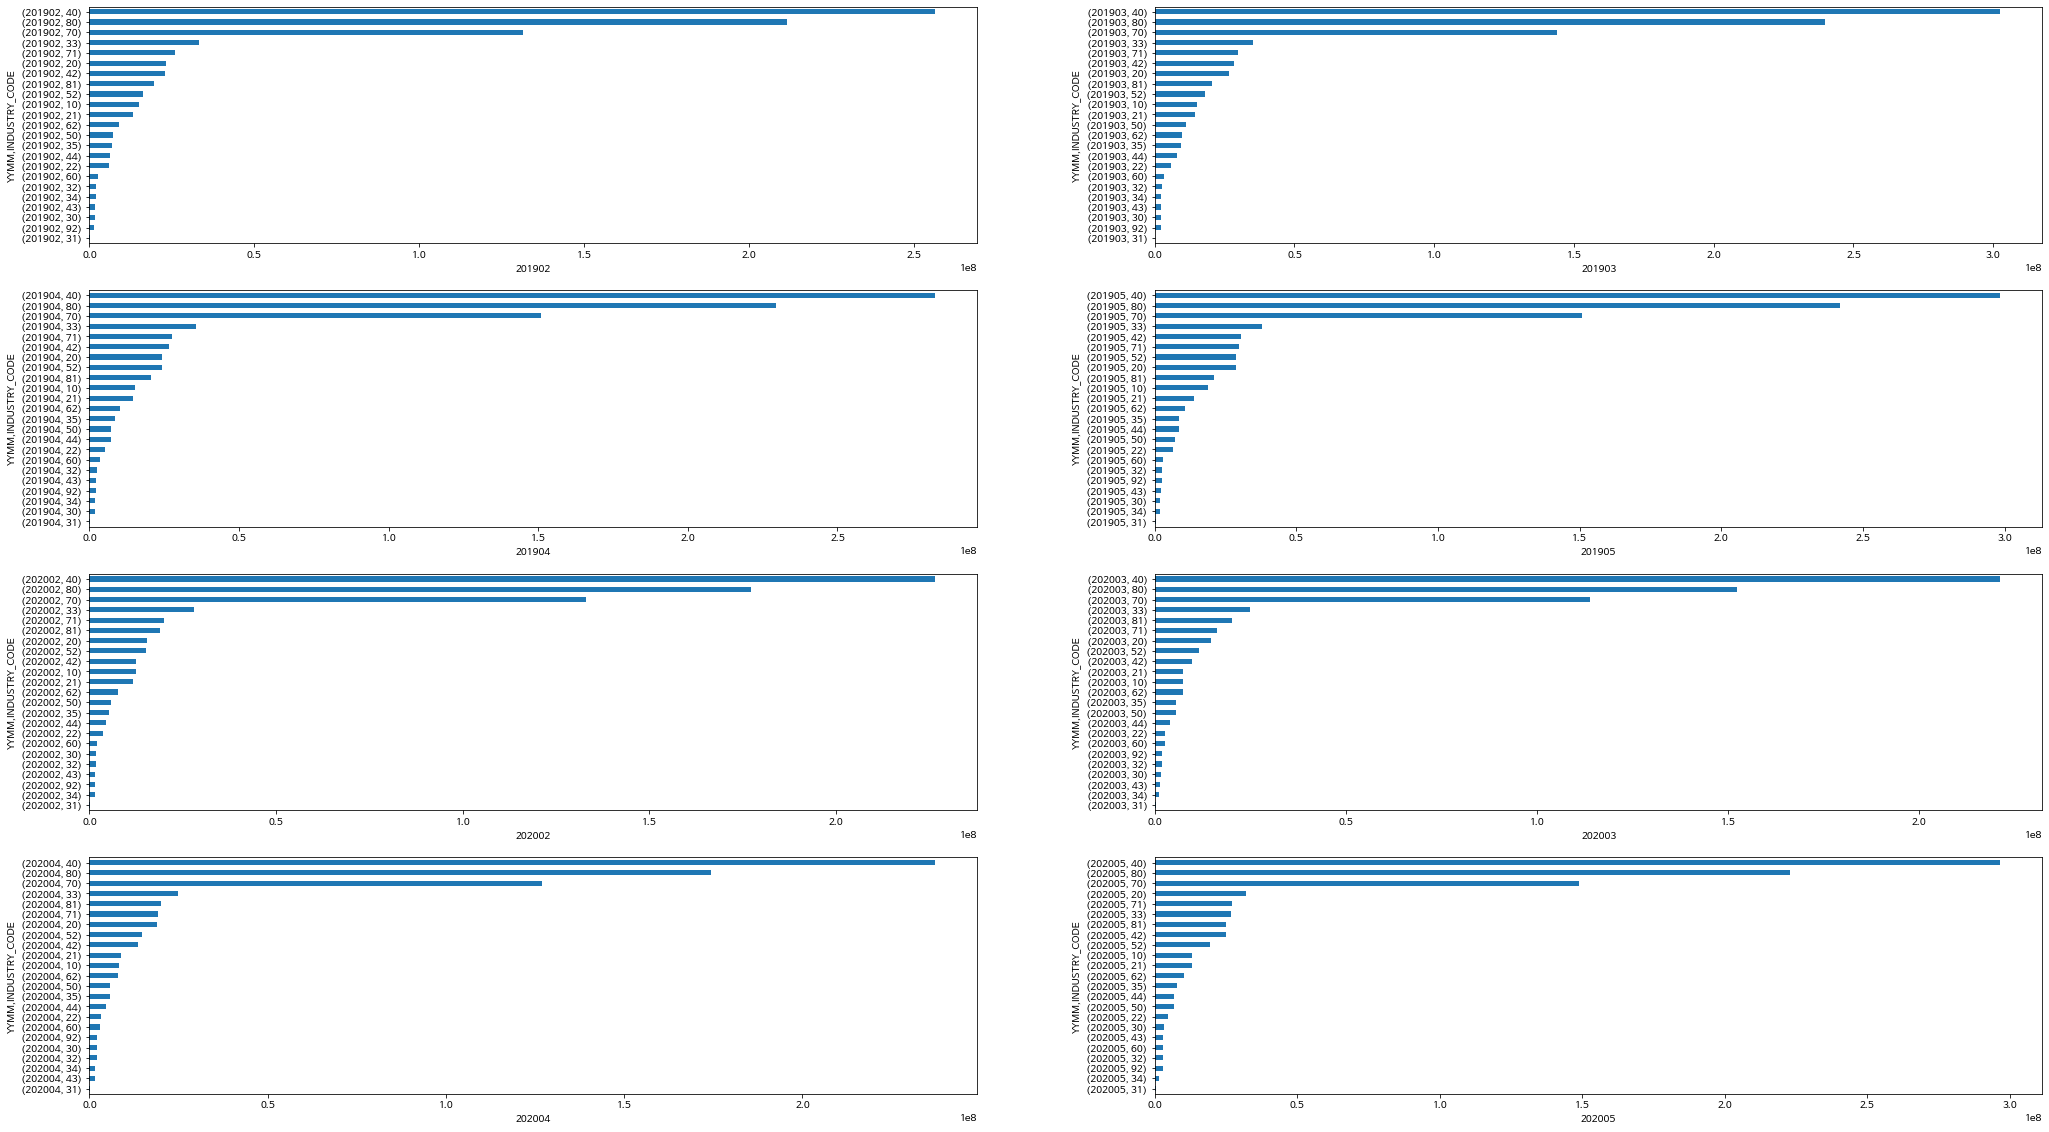

In [ ]:
resident['YYMM'] = (resident['YEAR']*100)+resident['MONTH']

# 1. 각 날짜의 'USE_AMT'의 합을 구한다
yymm_industry_to_amt = resident.groupby(['YYMM','INDUSTRY_CODE'])['USE_AMT'].sum()
n = 23
result = [yymm_industry_to_amt[i * n:(i + 1) * n] for i in range((len(yymm_industry_to_amt) + n - 1) // n )] 

# 2, subplot 표로 작성
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(35, 20))
result[0].sort_values().plot(kind='barh', fontsize=10, ax=axes[0,0])
result[1].sort_values().plot(kind='barh', fontsize=10, ax=axes[0,1])

result[2].sort_values().plot(kind='barh', fontsize=10, ax=axes[1,0])
result[3].sort_values().plot(kind='barh', fontsize=10, ax=axes[1,1])

result[4].sort_values().plot(kind='barh', fontsize=10, ax=axes[2,0])
result[5].sort_values().plot(kind='barh', fontsize=10, ax=axes[2,1])

result[6].sort_values().plot(kind='barh', fontsize=10, ax=axes[3,0])
result[7].sort_values().plot(kind='barh', fontsize=10, ax=axes[3,1])

label = resident['YYMM'].unique()
axes[0,0].set_xlabel(label[0])
axes[0,1].set_xlabel(label[1])
axes[1,0].set_xlabel(label[2])
axes[1,1].set_xlabel(label[3])
axes[2,0].set_xlabel(label[4])
axes[2,1].set_xlabel(label[5])
axes[3,0].set_xlabel(label[6])
axes[3,1].set_xlabel(label[7])

plt.show()
# 2019.2-2020.2 : 의복 하락, 서적문구/자동차정비 상승

#### 지역(동)&날짜별 매출액을 계산 

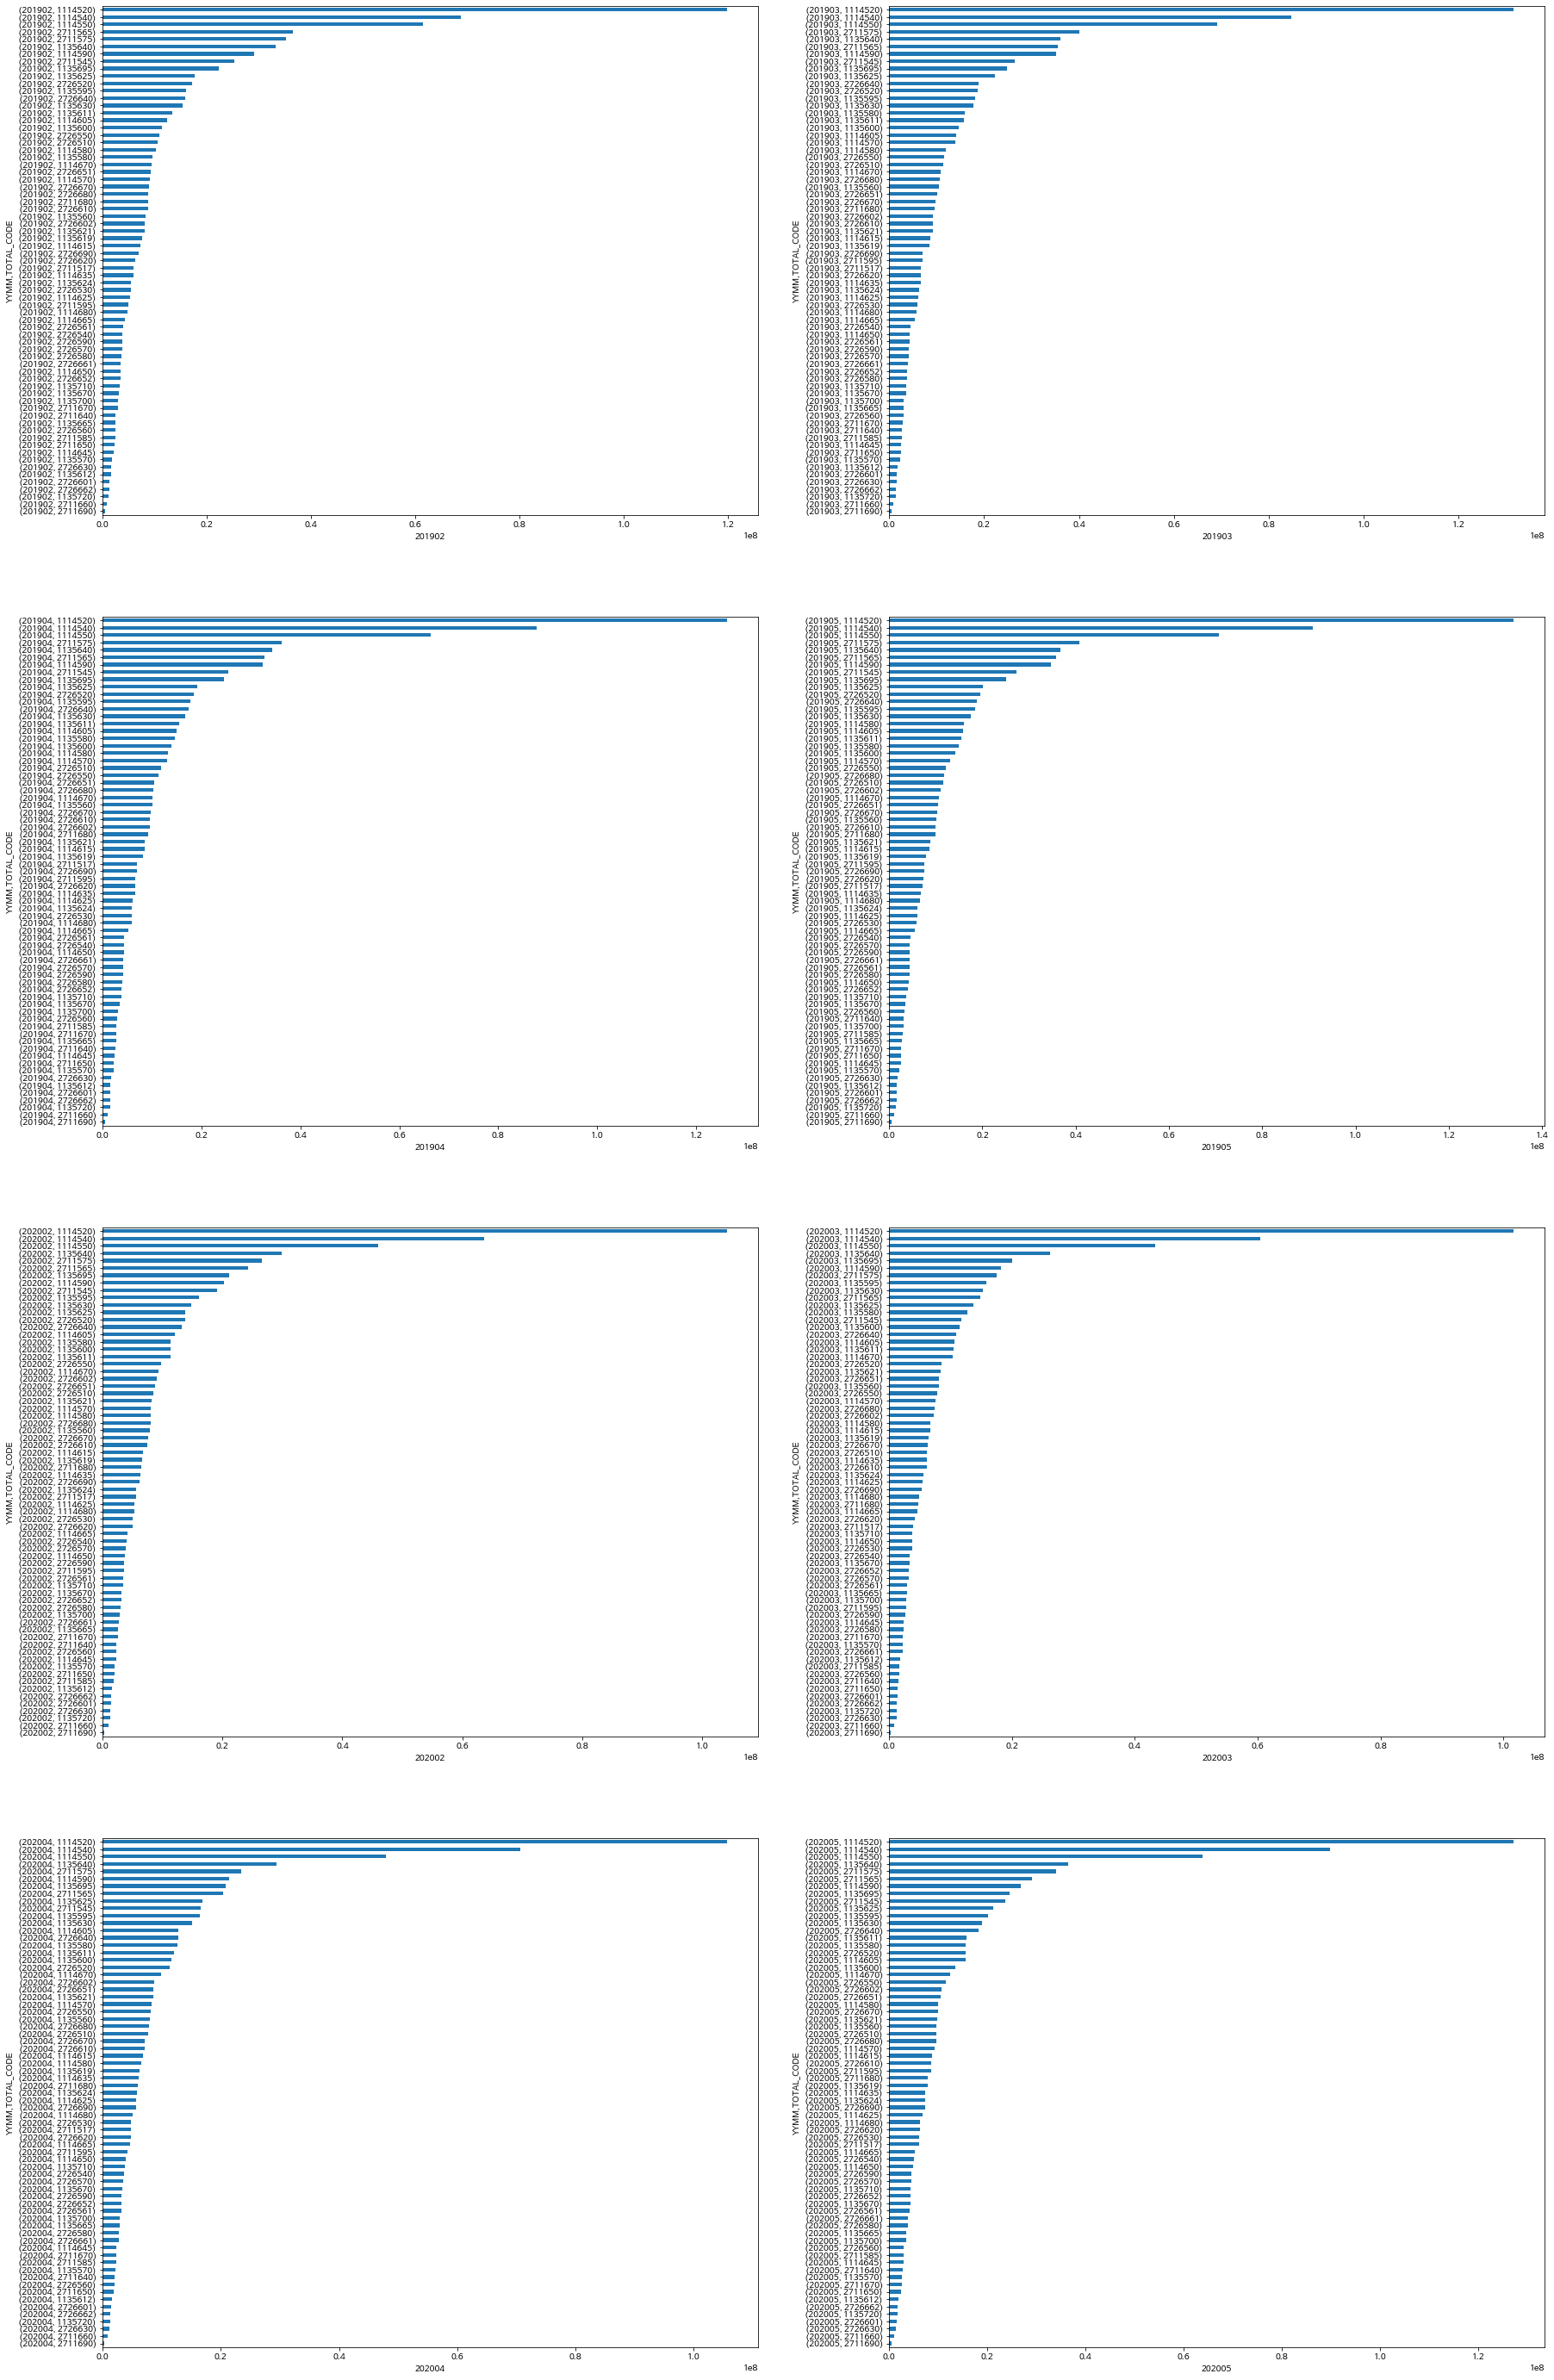

In [ ]:
# 1. 각 지역(동)&날짜의 'USE_AMT'의 합을 구한다
yymm_totalcode_to_amt = resident.groupby(['YYMM','TOTAL_CODE'])['USE_AMT'].sum()
# yymm_totalcode_to_cnt = resident.groupby(['YYMM','TOTAL_CODE'])['USE_CNT'].sum()
# yymm_totalcode=yymm_totalcode_to_amt/yymm_totalcode_to_cnt
n = 69
result = [yymm_totalcode_to_amt[i * n:(i + 1) * n] for i in range((len(yymm_totalcode_to_amt) + n - 1) // n )] 

# 2, subplot 표로 작성
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(30, 50))
result[0].sort_values().plot(kind='barh', fontsize=10, ax=axes[0,0])
result[1].sort_values().plot(kind='barh', fontsize=10, ax=axes[0,1])

result[2].sort_values().plot(kind='barh', fontsize=10, ax=axes[1,0])
result[3].sort_values().plot(kind='barh', fontsize=10, ax=axes[1,1])

result[4].sort_values().plot(kind='barh', fontsize=10, ax=axes[2,0])
result[5].sort_values().plot(kind='barh', fontsize=10, ax=axes[2,1])

result[6].sort_values().plot(kind='barh', fontsize=10, ax=axes[3,0])
result[7].sort_values().plot(kind='barh', fontsize=10, ax=axes[3,1])

label = resident['YYMM'].unique()
axes[0,0].set_xlabel(label[0])
axes[0,1].set_xlabel(label[1])
axes[1,0].set_xlabel(label[2])
axes[1,1].set_xlabel(label[3])
axes[2,0].set_xlabel(label[4])
axes[2,1].set_xlabel(label[5])
axes[3,0].set_xlabel(label[6])
axes[3,1].set_xlabel(label[7])

plt.show()

#### 년 & 업종별 매출액

<Figure size 432x288 with 0 Axes>

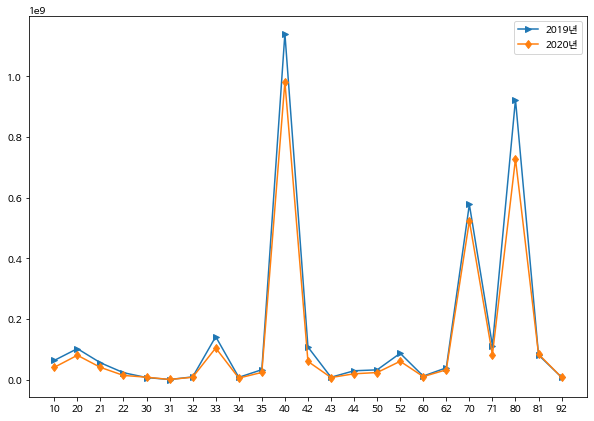

{10: '숙박',
 20: '레저용품',
 21: '레저업소',
 22: '문화취미',
 30: '가구',
 31: '전기',
 32: '주방용구',
 33: '연료판매',
 34: '광학제품',
 35: '가전',
 40: '유통업',
 42: '의복',
 43: '직물',
 44: '신변잡화',
 50: '서적문구',
 52: '사무통신',
 60: '자동차판매',
 62: '자동차정비',
 70: '의료기관',
 71: '보건위생',
 80: '요식업소',
 81: '음료식품',
 92: '수리서비스'}

In [ ]:

# 1. 각 날짜의 'USE_AMT'의 합을 구한다
yymm_industry_to_amt = resident.groupby(['YEAR','INDUSTRY_CODE'])['USE_AMT'].sum()
# print(yymm_industry_to_amt[:23], yymm_industry_to_amt[-23:])
textstr = sh_data['INDUSTRY_CODE_DICT']
plt.gcf().text(0.02, 0.5, textstr, fontsize=14)

label = sorted(resident['INDUSTRY_CODE'].unique())
index = np.arange(len(label))

plt.figure(figsize = (10,7))
plt.plot(index, yymm_industry_to_amt[:23],'>-' , label='2019년')
plt.plot(index, yymm_industry_to_amt[-23:],'d-', label='2020년')
plt.xticks(index, label)
plt.legend()
plt.show()
{10: '숙박', 20: '레저용품', 21: '레저업소', 22: '문화취미', 30: '가구', 31: '전기', 32: '주방용구', 
 33: '연료판매', 34: '광학제품', 35: '가전', 40: '유통업', 42: '의복', 
 43: '직물', 44: '신변잡화', 50: '서적문구', 52: '사무통신', 60: '자동차판매', 62: '자동차정비', 70: '의료기관',
 71: '보건위생', 80: '요식업소', 81: '음료식품', 92: '수리서비스'}

#### 월별 업종 매출액

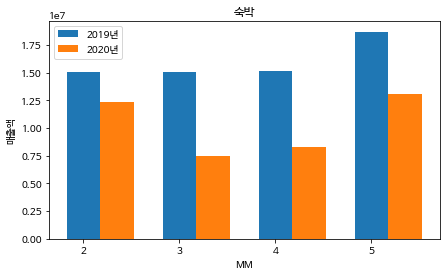

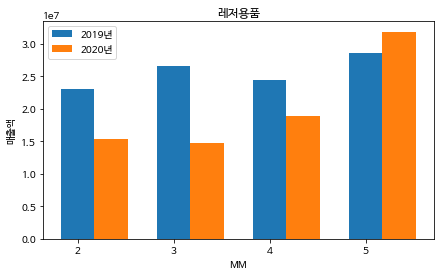

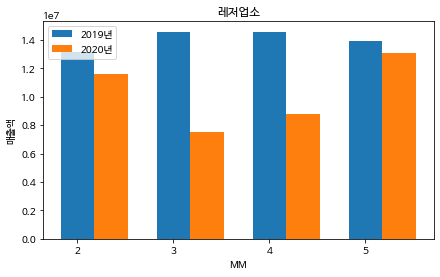

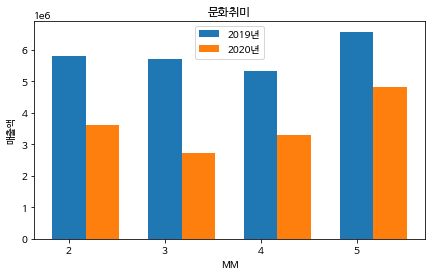

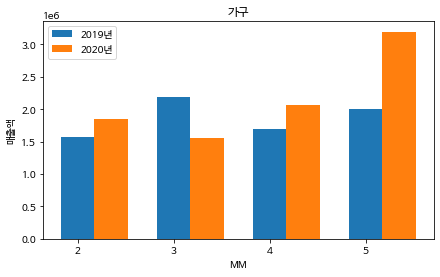

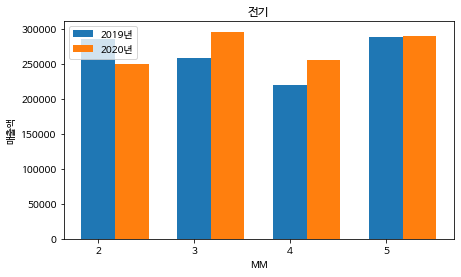

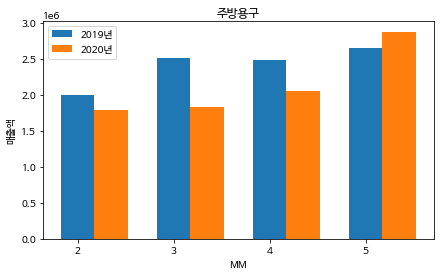

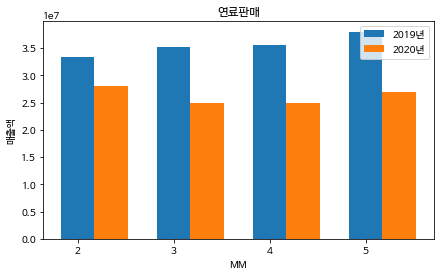

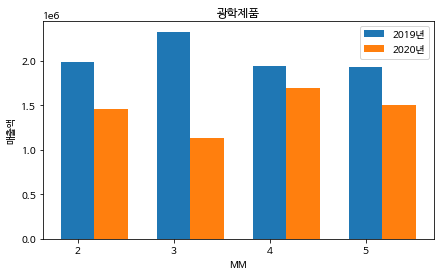

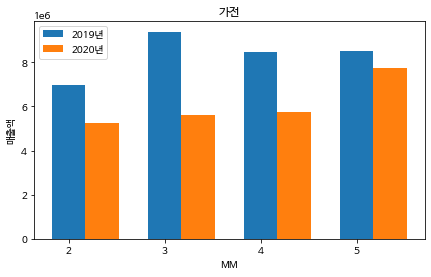

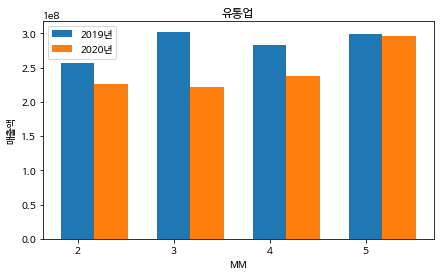

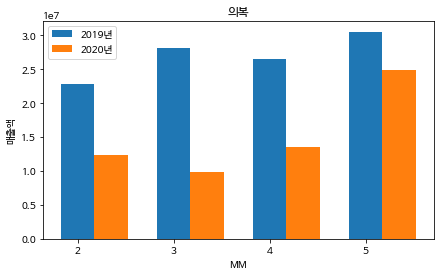

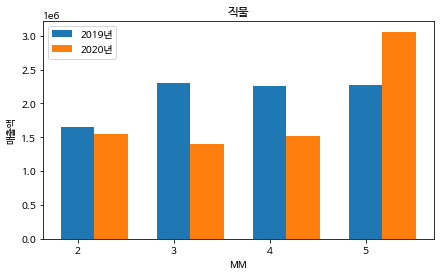

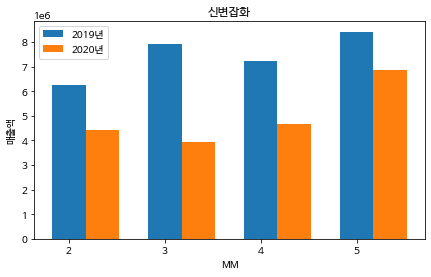

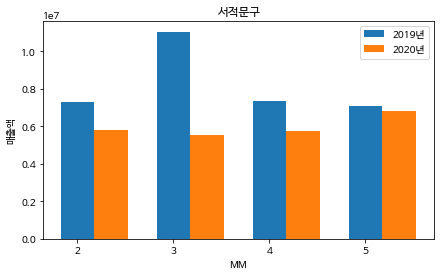

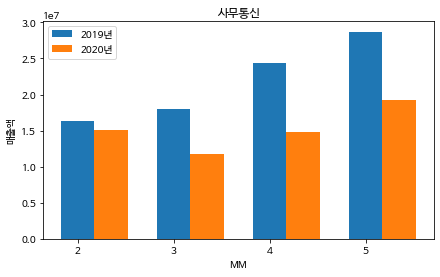

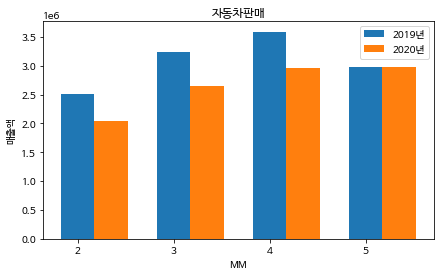

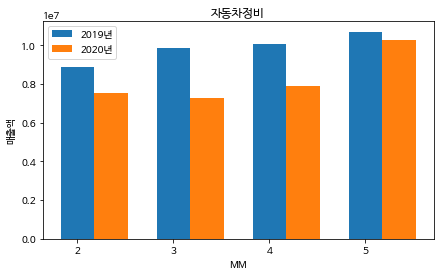

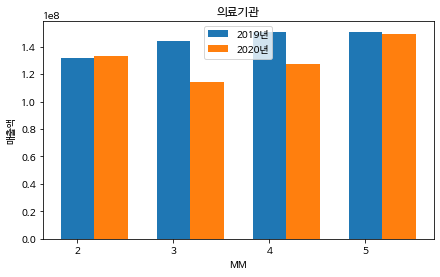

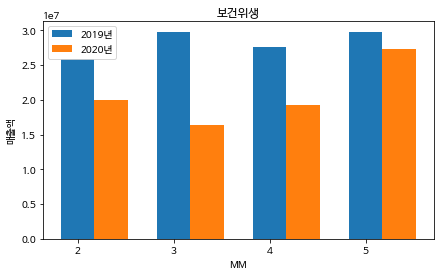

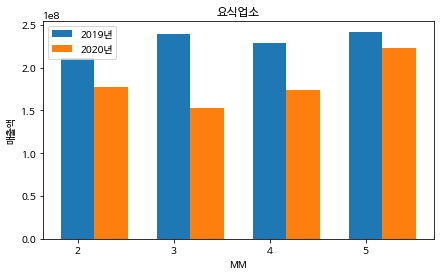

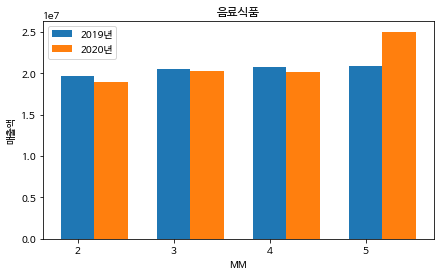

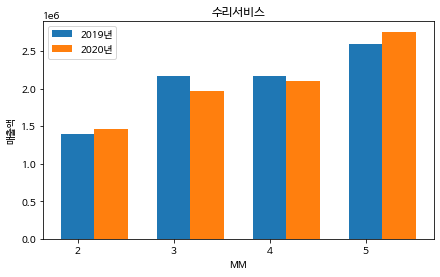

In [ ]:
# 월별 매출액

# 1. 각 월의 'USE_AMT'의 합을 구한다
yymm_industry_to_amt = resident.groupby(['INDUSTRY_CODE','YYMM'])['USE_AMT'].sum()
# print(yymm_industry_to_amt)
n = 8
result = [yymm_industry_to_amt[i * n:(i + 1) * n] for i in range((len(yymm_industry_to_amt) + n - 1) // n )] 
# print(result)
bar_width = 0.35
label = sorted(resident['MONTH'].unique())
index = np.arange(len(label))
code_dict = sh_data['INDUSTRY_CODE_DICT']

for i, val in zip(range(23), code_dict.values()):
  plt.figure(figsize = (7,4))
  plt.bar(index, result[i][:4],bar_width, label='2019년')
  plt.bar(index+bar_width,  result[i][-4:],bar_width, label='2020년')
  plt.xticks(index, label)
  plt.xlabel('MM')
  plt.ylabel('매출액')
  plt.title(val)
  plt.legend()
  plt.show()
  # 가구 데이터 증가 -> 가구 렌탈/살균 서비스 마치 정수기 렌탈서비와같이 주기적으로 살균및 교체 서비스 제공
  # 전기 데이터 증가 -> 감염병으로 집에 있는 시간이 증가하다보니까 냉난방(건물내 마스크착용, 제습기능 사용)
  # 연료판매 데이터 감소 -> 재택근무 및 외출 자제로 인한 자동차 사용 감소로 인해 연료매출이 감소
  # 유통업 감소 -> 유통업에는 대면 소비와 비대면소비가 함께 있음 -> cj의 유통데이터가 증가하는 모습을 보임 -> 비대면 소비만 증가함을 알수 있다.
  # 작물, 가전, 가구이 4월 이후로 급증 -> 코로나 피크시기인 2,3월에 있는 결혼을 미룬결과...?
  # 자동차판매, 자동차정비 -> 코로나가 줄어든 지점에서 캠핑의 수요가 증가한 결과...?
  # 의료기관 -> 횟수 그래프 그려보기
  # 음료식품 -> 4월 이후 제공된 정부긴급재난금 때문에..?
  # 요식업소 -> 4월 이후 제공된 정부긴급재난금 때문에 그래도 작년보다 적은 이유는 대면결제가 필요하기 때문에..?
  

#### 년 & 동별 

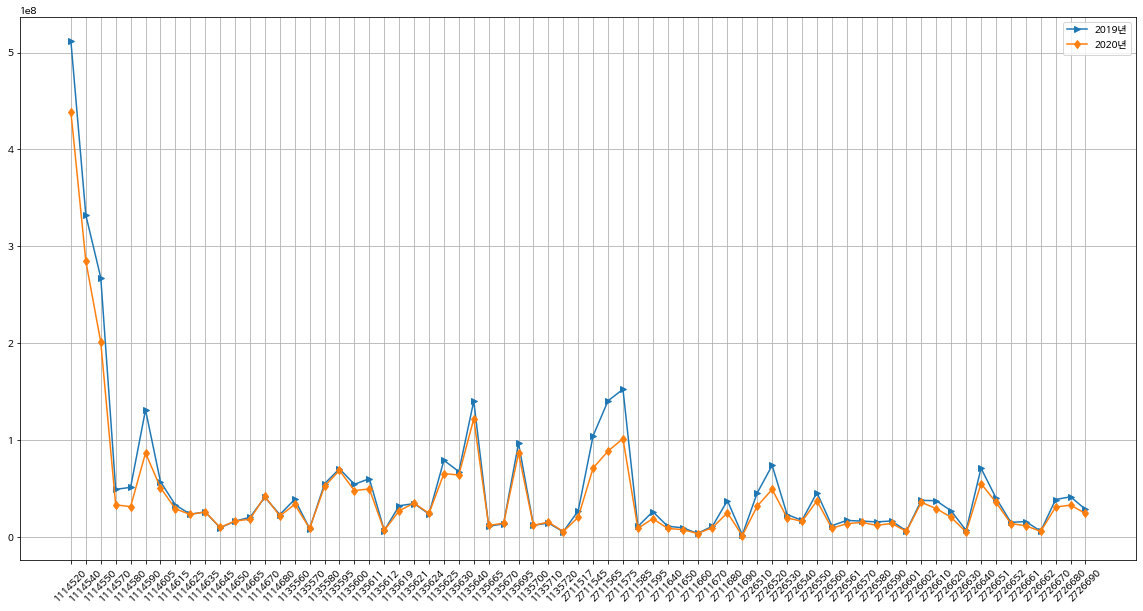

In [ ]:
# 년 & 동별 

# 1. 각 날짜의 'USE_AMT'의 합을 구한다
yymm_totalcode_to_amt = resident.groupby(['YEAR','TOTAL_CODE'])['USE_AMT'].sum()
# print(yymm_totalcode_to_amt[:69], yymm_totalcode_to_amt[-69:])

label = sorted(resident['TOTAL_CODE'].unique())
index = np.arange(len(label))

plt.figure(figsize = (20,10))
plt.plot(index, yymm_totalcode_to_amt[:69],'>-', label='2019년')
plt.plot(index, yymm_totalcode_to_amt[-69:],'d-', label='2020년')
plt.xticks(index, label, rotation='45')
plt.legend()
plt.grid()
plt.show()

#### 월별 총 매출액

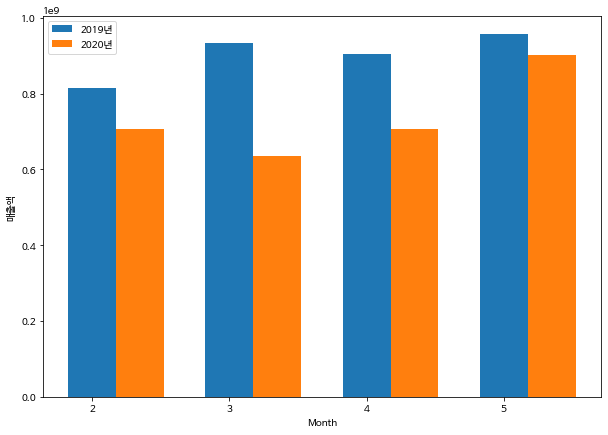

In [ ]:
# 월별 매출액

# 1. 각 월의 'USE_AMT'의 합을 구한다
yymm_to_amt = resident.groupby(['YYMM'])['USE_AMT'].sum()
# print(yymm_to_amt[:4], yymm_to_amt[-4:])

label = sorted(resident['MONTH'].unique())
index = np.arange(len(label))
bar_width = 0.35

plt.figure(figsize = (10,7))
plt.bar(index, yymm_to_amt[:4], bar_width, label='2019년')
plt.bar(index+bar_width,  yymm_to_amt[-4:],bar_width,  label='2020년')
plt.xticks(index, label)
plt.xlabel('Month')
plt.ylabel('매출액')
plt.legend()
plt.show()

# 와이즈넛 EDA

#### 와이즈넛 데이터

In [ ]:
ws_data.keys()

dict_keys(['WS_MENTION', 'WS_SENTIMENT', 'WS_TOPIC', 'COL_CHANGE_DICT', 'INDUSTRY_CODE_DICT', 'GEO_CODE_DICT'])

In [ ]:
ws_data['WS_TOPIC']

,YEAR,MONTH,GU_CODE,GU_NM,DONG_CODE,DONG_NM,TOPIC_WORD_LIST,SI_CODE,TOTAL_CODE
0,2019,2,14,서울 중구,520,소공동,"[장관, 기념식, 창간, 롯데호텔, 뷔페]",11,1114520
1,2019,3,14,서울 중구,520,소공동,"[총동창회, 서울대, 박물관, 월드비전, 프로그램]",11,1114520
2,2019,4,14,서울 중구,520,소공동,"[기생충, 반민특위, 강원도, 이재민, 푯돌]",11,1114520
3,2019,5,14,서울 중구,520,소공동,"[동계올림픽, 은퇴, 여제, 기자회견, 눈물]",11,1114520
4,2019,2,14,서울 중구,540,회현동,"[회현동, 서울역, 도시재생, 윤동주, 일제강점기]",11,1114540
...,...,...,...,...,...,...,...,...,...
135,2020,5,11,대구 중구,640,남산동,"[등교, 개학, 어린이날, 학생, 원격수업]",27,2711640
136,2020,2,11,대구 중구,680,대봉동,"[봉준호, 기념사업, 반월당, 주거타운, 상권]",27,2711680
137,2020,3,11,대구 중구,680,대봉동,"[코로나, 대구은행, 태평로, 특별재난지역, 확산]",27,2711680
138,2020,4,11,대구 중구,680,대봉동,"[코로나, 카페, 프랜차이즈, 소상공인, 골목]",27,2711680


#### 구별 워드클라우드 만들기

In [ ]:
from wordcloud import WordCloud
from collections import Counter

In [ ]:
gu_list = ws_data['WS_TOPIC']['GU_NM'].unique()
print(gu_list)
gu_word_list = {}

for gu in gu_list:
    ws_gu = ws_data['WS_TOPIC'].loc[ws_data['WS_TOPIC']['GU_NM'] == gu ]
    words_list = []
    for words in  ws_gu['TOPIC_WORD_LIST']:
        words_list.extend(words)
    gu_word_list[gu] = words_list

[서울 중구, 서울 노원구, 대구 수성구, 대구 중구]
Categories (4, object): [서울 중구, 서울 노원구, 대구 수성구, 대구 중구]


In [ ]:
for gu_nm, word_list in gu_word_list.items():
    count = Counter(word_list)
    words = dict(count.most_common())
    
    wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', 
                      background_color='white',
                      colormap = "rainbow_r").generate_from_frequencies(words) 
    plt.figure(figsize=(10, 6))
    plt.title(gu_nm, fontsize=15)
    plt.imshow(wordcloud) 
    plt.axis('off') 
    plt.show()

OSError: ignored

#### 년도별 워드클라우드 만들기

In [ ]:
ws_data['WS_TOPIC'].loc[ws_data['WS_TOPIC']['YEAR'] == 2019 ]

In [ ]:
yy_list = ws_data['WS_TOPIC']['YEAR'].unique()
yy_word_list = {}

for yy in yy_list:
    ws_yy = ws_data['WS_TOPIC'].loc[ws_data['WS_TOPIC']['YEAR'] == yy ]
    words_list = []
    for words in  ws_yy['TOPIC_WORD_LIST']:
        words_list.extend(words)
    yy_word_list[yy] = words_list

In [ ]:
for gu_nm, word_list in yy_word_list.items():
    count = Counter(word_list)
    words = dict(count.most_common())
    
    wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', 
                      background_color='white',
                      colormap = "rainbow_r").generate_from_frequencies(words) 
    plt.figure(figsize=(10, 6))
    plt.title(gu_nm, fontsize=15)
    plt.imshow(wordcloud) 
    plt.axis('off') 
    plt.show()

#### co -occurrence matrix

In [ ]:
docs = []
for words in ws_data['WS_TOPIC']['TOPIC_WORD_LIST']:
     docs.append(' '.join(words))
docs        

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
count_model = CountVectorizer(ngram_range=(1,1))
x = count_model.fit_transform(docs)

In [ ]:
print(count_model.vocabulary_)

In [ ]:
xc = x.T * x
xc.setdiag(0)
for i in xc.toarray():
    print(i)


# CJ EDA

#### cj 데이터

In [ ]:
cj_data.keys()

In [ ]:
cj = cj_data['CJ_DATA']
cj.head()

#### 년 & 배송상품 별 송장건수

In [ ]:
# 년 & 배송상품 별 송장건수
# 1. 각년의 월별 송장건수 합을 구한다
yymm_item_to_amt = cj.groupby(['YEAR','ITEM_CODE'])['TRANSIT_COUNT'].sum()
# print(yymm_item_to_amt[:10], yymm_item_to_amt[-10:])

label = sorted(cj['ITEM_CODE'].unique())
index = np.arange(len(label))

plt.figure(figsize = (7,5))
plt.plot(index, yymm_item_to_amt[:10],'>-' , label='2019년')
plt.plot(index, yymm_item_to_amt[-10:],'d-', label='2020년')
plt.xticks(index, label)
plt.legend()
plt.show()

# 2019년에 비해 2020년에 15(생활건강), 17(식품), 19(패션의류) 상품의 배송이 증가하였다. => 코로나로 인해 생필품을 비대면 쇼핑으로 사는경우가 증가하였다.

# 월별 물류상품 횟수

In [ ]:
# 월별 매출액
cj['YYMM'] = (cj['YEAR']*100)+cj['MONTH']
# 1. 각 월의 'USE_AMT'의 합을 구한다
yymm_item_to_cnt = cj.groupby(['ITEM_CODE','YYMM'])['TRANSIT_COUNT'].sum()
# print(yymm_item_to_cnt)
n = 8
result = [yymm_item_to_cnt[i * n:(i + 1) * n] for i in range((len(yymm_item_to_cnt) + n - 1) // n )] 
# print(result)
bar_width = 0.35
label = sorted(cj['MONTH'].unique())
index = np.arange(len(label))
code_dict = cj_data['ITEM_CODE_DICT']

for i, val in zip(range(10), code_dict.values()):
  plt.figure(figsize = (7,4))
  plt.bar(index, result[i][:4],bar_width, label='2019년')
  plt.bar(index+bar_width,  result[i][-4:],bar_width, label='2020년')
  plt.xticks(index, label)
  plt.xlabel('MM')
  plt.ylabel('매출액')
  plt.title(val)
  plt.legend()
  plt.show()

#### 월 & 배송상품 별 송장건수

In [ ]:
# 월 & 배송상품 별 송장건수

# 1. 각 날짜의 'USE_AMT'의 합을 구한다
yymm_item_to_amt = cj.groupby(['YEAR','MONTH','ITEM_CODE'])['TRANSIT_COUNT'].sum()
n = 10
result = [yymm_item_to_amt[i * n:(i + 1) * n] for i in range((len(yymm_item_to_amt) + n - 1) // n )] 

print(cj_data['ITEM_CODE_DICT'])

label = sorted(cj['ITEM_CODE'].unique())
index = np.arange(len(label))

plt.figure()
plt.plot(index, result[0],'>-', label='2019년2월')
plt.plot(index, result[4],'d-', label='2020년2월')
plt.xticks(index, label)
plt.legend()

plt.figure()
plt.plot(index, result[1],'>-', label='2019년3월')
plt.plot(index, result[5],'d-', label='2020년3월')
plt.xticks(index, label)
plt.legend()

plt.figure()
plt.plot(index, result[2],'>-', label='2019년4월')
plt.plot(index, result[6],'d-', label='2020년4월')
plt.xticks(index, label)
plt.legend()

plt.figure()
plt.plot(index, result[3],'>-', label='2019년5월')
plt.plot(index, result[7],'d-', label='2020년5월')
plt.xticks(index, label)
plt.legend()

plt.show()

#### 년 & 동 배송상품 별 송장건수

In [ ]:
# 년 & 배송상품 별 송장건수

# 1. 각 날짜의 'USE_AMT'의 합을 구한다
dong_item_to_amt = cj.groupby(['YEAR','DONG_NM'])['TRANSIT_COUNT'].sum()
# print(result[0])

label = sorted(cj['DONG_NM'].unique())
index = np.arange(len(label))

bar_width = 0.35

plt.figure(figsize = (40,15))
plt.bar(index, dong_item_to_amt[:69], bar_width, label='2019년')
plt.bar(index+bar_width, dong_item_to_amt[-69:],bar_width, label='2020년')
plt.xticks(index, label, rotation='45', fontsize=19)
plt.legend()
plt.show()


# GS EDA

#### gs 데이터

In [ ]:
gs_data.keys()

In [ ]:
gs_data['GS_TOTAL']